# Pandas - III - Data Ops 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn')
sns.set(color_codes=True)

# <font color = 'green'>1. Hierarchial Indexing</font>
Reference: 1. [3d Plots](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.16-3D-Surface-Plots/)

## <font color = 'blue'>1.1 Hierarchial Indexing of Series</font>

In [2]:
s = pd.Series(np.random.randn(10), index = [list('aaaabbccdd'), [1, 2, 3, 1, 3, 1, 2, 2, 3, 1]])
s

a  1   -0.548516
   2   -0.913891
   3    1.261983
   1    0.937825
b  3   -0.748947
   1    0.213095
c  2   -0.148166
   2    0.831717
d  3   -0.067187
   1    0.016804
dtype: float64

In [3]:
s.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('a', 1),
            ('b', 3),
            ('b', 1),
            ('c', 2),
            ('c', 2),
            ('d', 3),
            ('d', 1)],
           )

In [4]:
s.index.names = ['key1', 'key2']
s

key1  key2
a     1      -0.548516
      2      -0.913891
      3       1.261983
      1       0.937825
b     3      -0.748947
      1       0.213095
c     2      -0.148166
      2       0.831717
d     3      -0.067187
      1       0.016804
dtype: float64

In [5]:
multi_series = pd.Series(np.random.randn(10), index = [list('aaabbbccdd'), [1, 2, 3, 2, 3, 4, 4, 5, 5, 6]])
multi_series.index.names = ['key1', 'key2']
multi_series.sort_index(level=['key1','key2'], ascending=[1, 1], inplace=True)
multi_series

key1  key2
a     1      -1.013349
      2       0.528616
      3       0.726767
b     2      -0.513068
      3       0.020858
      4      -0.059237
c     4       0.847429
      5       0.070135
d     5      -1.348071
      6      -0.796237
dtype: float64

In [6]:
multi_series.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 2),
            ('b', 3),
            ('b', 4),
            ('c', 4),
            ('c', 5),
            ('d', 5),
            ('d', 6)],
           names=['key1', 'key2'])

In [7]:
multi_series['b']

key2
2   -0.513068
3    0.020858
4   -0.059237
dtype: float64

In [8]:
# With a hierarchically indexed object, so-called partial indexing is possible, enabling you to concisely select subsets of the data:
s['a']

key2
1   -0.548516
2   -0.913891
3    1.261983
1    0.937825
dtype: float64

In [9]:
s['b':'c']

key1  key2
b     3      -0.748947
      1       0.213095
c     2      -0.148166
      2       0.831717
dtype: float64

In [10]:
s.loc[['b', 'd']]

key1  key2
b     3      -0.748947
      1       0.213095
d     3      -0.067187
      1       0.016804
dtype: float64

In [11]:
s.loc['b':'d']

key1  key2
b     3      -0.748947
      1       0.213095
c     2      -0.148166
      2       0.831717
d     3      -0.067187
      1       0.016804
dtype: float64

In [12]:
# Selection is even possible from an “inner” level:
s.loc[:, 2]

key1
a   -0.913891
c   -0.148166
c    0.831717
dtype: float64

In [13]:
# Sorting multi-index Series:
s.sort_index(level=['key1','key2'], ascending=[1, 1], inplace=True)
s

key1  key2
a     1      -0.548516
      1       0.937825
      2      -0.913891
      3       1.261983
b     1       0.213095
      3      -0.748947
c     2      -0.148166
      2       0.831717
d     1       0.016804
      3      -0.067187
dtype: float64

In [14]:
s['a':'c']

key1  key2
a     1      -0.548516
      1       0.937825
      2      -0.913891
      3       1.261983
b     1       0.213095
      3      -0.748947
c     2      -0.148166
      2       0.831717
dtype: float64

Hierarchical indexing plays an important role in reshaping data and group-based operations like forming a pivot table. For example, you could rearrange the data into a DataFrame using its <code>unstack()</code> method:

In [15]:
s = pd.Series(np.random.randn(10), index = [list('aaabbbccdd'), [1, 2, 3, 2, 3, 4, 4, 5, 5, 6]])
s.index.names = ['key1', 'key2']
s.sort_index(level=['key1','key2'], ascending=[1, 1], inplace=True)
s

key1  key2
a     1      -0.382907
      2       0.462170
      3       0.068515
b     2       1.946332
      3       0.651264
      4       1.486735
c     4       0.086508
      5      -1.172398
d     5       0.639015
      6      -1.170430
dtype: float64

In [16]:
s.unstack()

key2,1,2,3,4,5,6
key1,,,,,,
a,-0.382907,0.462170,0.068515,NaN,NaN,NaN
b,NaN,1.946332,0.651264,1.486735,NaN,NaN
c,NaN,NaN,NaN,0.086508,-1.172398,NaN
d,NaN,NaN,NaN,NaN,0.639015,-1.17043


In [17]:
# The inverse operation of unstack is stack:
s.unstack().stack()

key1  key2
a     1      -0.382907
      2       0.462170
      3       0.068515
b     2       1.946332
      3       0.651264
      4       1.486735
c     4       0.086508
      5      -1.172398
d     5       0.639015
      6      -1.170430
dtype: float64

## <font color = 'blue'>1.2 Hierarchial Indexing of DataFrame</font>

In [18]:
data = pd.read_csv('CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [19]:
data.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [20]:
pd.pivot_table(data, index=['Product', 'Gender'], columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [21]:
s = 'abcdefghij'
s2 = s[:3]
l = list(s2)
l2 = sorted(l*3)
l3 = sorted([f'Product {i+1}' for i in range(4)]*2)
l4 = ['Price', 'Rating']*4
d1 = pd.DataFrame(np.random.randint(1, 100, 72).reshape(9, 8), index = [l2, [1, 2, 3]*3], columns = [l3, l4])
d1

Product 1        Product 2        Product 3        Product 4       
        Price Rating     Price Rating     Price Rating     Price Rating
a 1        86     47        92     90        75     84        76     97
  2        31     39        74     37        96     21        77     92
  3        39     80        37     61        45     15        54     19
b 1        96     43        86     77        43     11        53     15
  2        24     36        46     73         7     94        64     63
  3        95     38        31     44        16     70        10     81
c 1        71     33        29     30         6     28        99     90
  2        33     53        32     38        36     79        81     54
  3         3     21        95     26        34      4        70     14

In [22]:
# Note: Use MultiIndex object to fix index and column names.
d1.index.names = ['key1', 'key2']
d1.columns.names = ['Product', 'Values']
d1

Product   Product 1        Product 2        Product 3        Product 4       
Values        Price Rating     Price Rating     Price Rating     Price Rating
key1 key2                                                                    
a    1           86     47        92     90        75     84        76     97
     2           31     39        74     37        96     21        77     92
     3           39     80        37     61        45     15        54     19
b    1           96     43        86     77        43     11        53     15
     2           24     36        46     73         7     94        64     63
     3           95     38        31     44        16     70        10     81
c    1           71     33        29     30         6     28        99     90
     2           33     53        32     38        36     79        81     54
     3            3     21        95     26        34      4        70     14

In [23]:
d1['Product 2']

Values     Price  Rating
key1 key2               
a    1        92      90
     2        74      37
     3        37      61
b    1        86      77
     2        46      73
     3        31      44
c    1        29      30
     2        32      38
     3        95      26

In [24]:
d1.loc['a', :]

Product Product 1        Product 2        Product 3        Product 4       
Values      Price Rating     Price Rating     Price Rating     Price Rating
key2                                                                       
1              86     47        92     90        75     84        76     97
2              31     39        74     37        96     21        77     92
3              39     80        37     61        45     15        54     19

In [25]:
d1.loc['b':'c', 'Product 2':'Product 4']

Product   Product 2        Product 3        Product 4       
Values        Price Rating     Price Rating     Price Rating
key1 key2                                                   
b    1           86     77        43     11        53     15
     2           46     73         7     94        64     63
     3           31     44        16     70        10     81
c    1           29     30         6     28        99     90
     2           32     38        36     79        81     54
     3           95     26        34      4        70     14

In [26]:
d1.loc['a':'b', ['Product 2','Product 4']]

Product   Product 2        Product 4       
Values        Price Rating     Price Rating
key1 key2                                  
a    1           92     90        76     97
     2           74     37        77     92
     3           37     61        54     19
b    1           86     77        53     15
     2           46     73        64     63
     3           31     44        10     81

## <font color = 'blue'>1.3 Reordering and Sorting Levels</font>
At times you will need to rearrange the order of the levels on an axis or sort the data
by the values in one specific level. The <code>swaplevel</code> takes two level numbers or names
and returns a new object with the levels interchanged (but the data is otherwise
unaltered):

In [27]:
d1

Product   Product 1        Product 2        Product 3        Product 4       
Values        Price Rating     Price Rating     Price Rating     Price Rating
key1 key2                                                                    
a    1           86     47        92     90        75     84        76     97
     2           31     39        74     37        96     21        77     92
     3           39     80        37     61        45     15        54     19
b    1           96     43        86     77        43     11        53     15
     2           24     36        46     73         7     94        64     63
     3           95     38        31     44        16     70        10     81
c    1           71     33        29     30         6     28        99     90
     2           33     53        32     38        36     79        81     54
     3            3     21        95     26        34      4        70     14

In [28]:
d2 = d1.swaplevel('key1', 'key2')
d2

Product   Product 1        Product 2        Product 3        Product 4       
Values        Price Rating     Price Rating     Price Rating     Price Rating
key2 key1                                                                    
1    a           86     47        92     90        75     84        76     97
2    a           31     39        74     37        96     21        77     92
3    a           39     80        37     61        45     15        54     19
1    b           96     43        86     77        43     11        53     15
2    b           24     36        46     73         7     94        64     63
3    b           95     38        31     44        16     70        10     81
1    c           71     33        29     30         6     28        99     90
2    c           33     53        32     38        36     79        81     54
3    c            3     21        95     26        34      4        70     14

<code>sort_index</code>, on the other hand, sorts the data using only the values in a single level.
When swapping levels, it’s not uncommon to also use <code>sort_index</code> so that the result is
lexicographically sorted by the indicated level:

In [29]:
d2.sort_index(level = 0)

Product   Product 1        Product 2        Product 3        Product 4       
Values        Price Rating     Price Rating     Price Rating     Price Rating
key2 key1                                                                    
1    a           86     47        92     90        75     84        76     97
     b           96     43        86     77        43     11        53     15
     c           71     33        29     30         6     28        99     90
2    a           31     39        74     37        96     21        77     92
     b           24     36        46     73         7     94        64     63
     c           33     53        32     38        36     79        81     54
3    a           39     80        37     61        45     15        54     19
     b           95     38        31     44        16     70        10     81
     c            3     21        95     26        34      4        70     14

In [30]:
d3 = d2.swaplevel('key1', 'key2').sort_index(level = 0)
d3

Product   Product 1        Product 2        Product 3        Product 4       
Values        Price Rating     Price Rating     Price Rating     Price Rating
key1 key2                                                                    
a    1           86     47        92     90        75     84        76     97
     2           31     39        74     37        96     21        77     92
     3           39     80        37     61        45     15        54     19
b    1           96     43        86     77        43     11        53     15
     2           24     36        46     73         7     94        64     63
     3           95     38        31     44        16     70        10     81
c    1           71     33        29     30         6     28        99     90
     2           33     53        32     38        36     79        81     54
     3            3     21        95     26        34      4        70     14

In [31]:
# Check Equality
d1.equals(d3)

True

### Note:
Data selection performance is much better on hierarchically
indexed objects if the index is lexicographically sorted starting with
the outermost level—that is, the result of calling
<code>sort_index(level=0)</code> or <code>sort_index()</code>.

## <font color = 'blue'>1.4 Summary Statistics by Level</font>
Many descriptive and summary statistics on DataFrame and Series have a level
option in which you can specify the level you want to aggregate by on a particular
axis. Under the hood, this utilizes pandas’s groupby machinery.

Consider the above DataFrame; we can aggregate by level on either the rows or
columns like so:

In [32]:
d1.sum(level = 'key1')

Product Product 1        Product 2        Product 3        Product 4       
Values      Price Rating     Price Rating     Price Rating     Price Rating
key1                                                                       
a             156    166       203    188       216    120       207    208
b             215    117       163    194        66    175       127    159
c             107    107       156     94        76    111       250    158

In [33]:
d1.mean(level = 'key2').round(2)

Product Product 1        Product 2        Product 3        Product 4       
Values      Price Rating     Price Rating     Price Rating     Price Rating
key2                                                                       
1           84.33  41.00     69.00  65.67     41.33  41.00     76.00  67.33
2           29.33  42.67     50.67  49.33     46.33  64.67     74.00  69.67
3           45.67  46.33     54.33  43.67     31.67  29.67     44.67  38.00

In [34]:
d1.std(level = 'Product', axis = 1).round(2)

Product    Product 1  Product 2  Product 3  Product 4
key1 key2                                            
a    1         27.58       1.41       6.36      14.85
     2          5.66      26.16      53.03      10.61
     3         28.99      16.97      21.21      24.75
b    1         37.48       6.36      22.63      26.87
     2          8.49      19.09      61.52       0.71
     3         40.31       9.19      38.18      50.20
c    1         26.87       0.71      15.56       6.36
     2         14.14       4.24      30.41      19.09
     3         12.73      48.79      21.21      39.60

In [35]:
name = [f'Product {i}' for i in list('abcdefgh'.upper())]
color = np.random.choice(['Red', 'Green', 'Blue'], size = 8)
price = np.random.randint(10, 20, 8)*100
units = np.random.randint(100, 200, 8)
rating = np.random.randint(1, 10, 8)
keys = ['Name', 'Color', 'Price', 'Units', 'Rating']
values = [name, color, price, units, rating]
data = pd.DataFrame(dict(zip(keys, values)))
data

,Name,Color,Price,Units,Rating
0,Product A,Blue,1800,190,6
1,Product B,Green,1300,124,5
2,Product C,Red,1300,178,3
3,Product D,Blue,1900,114,6
4,Product E,Green,1700,180,9
5,Product F,Blue,1000,129,7
6,Product G,Red,1400,140,3
7,Product H,Green,1200,116,6


In [36]:
data.set_index('Color').sort_index()

,Name,Price,Units,Rating
Color,,,,
Blue,Product A,1800,190,6
Blue,Product D,1900,114,6
Blue,Product F,1000,129,7
Green,Product B,1300,124,5
Green,Product E,1700,180,9
Green,Product H,1200,116,6
Red,Product C,1300,178,3
Red,Product G,1400,140,3


In [37]:
data.set_index(['Name', 'Color']).sort_index()

,,Price,Units,Rating
Name,Color,,,
Product A,Blue,1800,190,6
Product B,Green,1300,124,5
Product C,Red,1300,178,3
Product D,Blue,1900,114,6
Product E,Green,1700,180,9
Product F,Blue,1000,129,7
Product G,Red,1400,140,3
Product H,Green,1200,116,6


In [38]:
data.set_index(['Color', 'Name']).sort_index()

Price  Units  Rating
Color Name                           
Blue  Product A   1800    190       6
      Product D   1900    114       6
      Product F   1000    129       7
Green Product B   1300    124       5
      Product E   1700    180       9
      Product H   1200    116       6
Red   Product C   1300    178       3
      Product G   1400    140       3

In [39]:
data.set_index(['Color', 'Rating']).sort_index()

Name  Price  Units
Color Rating                         
Blue  6       Product A   1800    190
      6       Product D   1900    114
      7       Product F   1000    129
Green 5       Product B   1300    124
      6       Product H   1200    116
      9       Product E   1700    180
Red   3       Product C   1300    178
      3       Product G   1400    140

# <font color = 'green'>2. Merge: Combining and Merging Datasets</font>
## <font color = 'blue'>2.1 Theory</font>

Data contained in pandas objects can be combined together in a number of ways:
- <code>pandas.merge</code> connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
- <code>pandas.concat</code> concatenates or “stacks” together objects along an axis.
- The <code>combine_first</code> instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

In [40]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
print(df1)
print()
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

  key  data2
0   a      0
1   b      1
2   d      2


This is an example of a many-to-one join; the data in df1 has multiple rows labeled a
and b, whereas df2 has only one row for each value in the key column. Calling <code>merge</code>
with these objects we obtain:

In [41]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Note that I didn’t specify which column to join on. If that information is not specified,
<code>merge</code> uses the overlapping column names as the keys. It’s a good practice to
specify explicitly, though:

In [42]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [43]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'], 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


## <font color = 'green'>2.2 Example</font>
**Reference:** 
 - [DS Shane Lynn](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/)
 - [TDS](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)

In [44]:
user_usage = pd.read_csv("user_usage.csv")
user_device = pd.read_csv("user_device.csv")
devices = pd.read_csv("android_devices.csv")
devices.rename(columns={"Retail Branding": "Manufacturer"}, inplace=True)

In [45]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [46]:
user_usage.shape

(240, 4)

In [47]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [48]:
user_device.shape

(272, 6)

In [49]:
devices.head()

,Manufacturer,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [50]:
devices.shape

(14546, 4)

## First merge

We're trying to get the average usage figures for different types of devices. So we need to get the user's device code from <code>user_usage</code> as a column on <code>user_usage</code>, and then get the device's manufacturer from <code>devices</code> as a column on the result.

First, we merge <code>user_usage</code> with <code>user_device</code> with "<code>use_id</code>" as our common column.

In [51]:
# The defalt merge executes an inner merge.
usage = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device', 'use_type_id']],
                 on='use_id')
usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id
0,21.97,4.82,1557.33,22787,android,GT-I9505,1
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1
3,94.46,35.17,519.12,22790,android,D2303,1
4,71.59,79.26,1557.33,22792,android,SM-G361F,1


In [52]:
usage.isnull().sum()

outgoing_mins_per_month    0
outgoing_sms_per_month     0
monthly_mb                 0
use_id                     0
platform                   0
device                     0
use_type_id                0
dtype: int64

While on first glance, this may seem perfect, all is not as it seems.

In [53]:
print("user_usage dimensions: {}".format(user_usage.shape))
print("user_device dimensions: {}".format(user_device[['use_id', 'platform', 'device']].shape))
print("usage dimensions: {}".format(usage.shape))

user_usage dimensions: (240, 4)
user_device dimensions: (272, 3)
usage dimensions: (159, 7)


## Left merge example

A left merge, or left join, between two dataframes keeps all of the rows and values from the left dataframe, in this case "user_usage". Rows from the right dataframe will be kept in the result only where there is a match in the merge variable in the right dataframe, and NaN values will be in the result where not.

In [54]:
usage_left = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device', 'use_type_id']],
                 on='use_id', how='left')
usage_left.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id
0,21.97,4.82,1557.33,22787,android,GT-I9505,1.0
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1.0
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1.0
3,94.46,35.17,519.12,22790,android,D2303,1.0
4,71.59,79.26,1557.33,22792,android,SM-G361F,1.0


In [55]:
usage_left.isnull().sum()

outgoing_mins_per_month     0
outgoing_sms_per_month      0
monthly_mb                  0
use_id                      0
platform                   81
device                     81
use_type_id                81
dtype: int64

In [56]:
print("user_usage dimensions: {}".format(user_usage.shape))
print("result dimensions: {}".format(usage_left.shape))
print("There are {} missing values in the result.".format(
        usage_left['device'].isnull().sum()))

user_usage dimensions: (240, 4)
result dimensions: (240, 7)
There are 81 missing values in the result.


## Right merge example

A right merge, or right join, between two dataframes keeps all of the rows and values from the right dataframe, in this case "user_device". Rows from the left dataframe will be kept where there is a match in the merge variable, and NaN values will be in the result where not.

In [57]:
usage_right = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device', 'use_type_id']],
                 on='use_id', how='right')
usage_right.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id
0,21.97,4.82,1557.33,22787,android,GT-I9505,1
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1
3,94.46,35.17,519.12,22790,android,D2303,1
4,71.59,79.26,1557.33,22792,android,SM-G361F,1


In [58]:
usage_right.isnull().sum()

outgoing_mins_per_month    113
outgoing_sms_per_month     113
monthly_mb                 113
use_id                       0
platform                     0
device                       0
use_type_id                  0
dtype: int64

In [59]:
print("user_device dimensions: {}".format(user_device.shape))
print("result dimensions: {}".format(usage_right.shape))
print("There are {} missing values in the 'monthly_mb' column in the result.".format(
        usage_right['monthly_mb'].isnull().sum()))
print("There are {} missing values in the 'platform' column in the result.".format(
        usage_right['platform'].isnull().sum()))

user_device dimensions: (272, 6)
result dimensions: (272, 7)
There are 113 missing values in the 'monthly_mb' column in the result.
There are 0 missing values in the 'platform' column in the result.


## Outer merge example

A full outer join, or outer merge, keeps all rows from the left and right dataframe in the result. Rows will be aligned where there is shared join values between the left and right, and rows with NaN values, in either the left-originating or right-originating columns will be, will be left in the result where there is no shared join value.

In the final result, a subset of rows should have no missing values. These rows are the rows where there was a match between the merge column in the left and right dataframes. These rows are the same values as found by our inner merge result before.

In [60]:
usage_outer = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device', 'use_type_id']],
                 on='use_id', how='outer', indicator=True)
usage_outer.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id,_merge
0,21.97,4.82,1557.33,22787,android,GT-I9505,1.0,both
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1.0,both
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1.0,both
3,94.46,35.17,519.12,22790,android,D2303,1.0,both
4,71.59,79.26,1557.33,22792,android,SM-G361F,1.0,both


In [61]:
print("There are {} unique values of use_id in our dataframes.".format(
        pd.concat([user_usage['use_id'], user_device['use_id']]).unique().shape[0]))


print("Outer merge result has {} rows.".format(usage_outer.shape))

# This is consistent with the 'usage' dataframe above.
print("There are {} rows with no missing values.".format(
    (usage_outer.apply(lambda x: x.isnull().sum(), axis=1) == 0).sum()))

There are 353 unique values of use_id in our dataframes.
Outer merge result has (353, 8) rows.
There are 159 rows with no missing values.


In [62]:
usage_outer.iloc[[0, 1, 200,201, 350,351]]

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id,_merge
0,21.97,4.82,1557.33,22787,android,GT-I9505,1.0,both
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1.0,both
200,28.79,29.42,3114.67,23988,NaN,NaN,NaN,left_only
201,616.56,99.85,5414.14,24006,NaN,NaN,NaN,left_only
350,NaN,NaN,NaN,23050,ios,"iPhone7,2",3.0,right_only
351,NaN,NaN,NaN,23051,ios,"iPhone7,2",3.0,right_only


## Final merge - adding device manufacturer

In [63]:
# First, add the platform and device to the user usage.
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device', 'use_type_id']],
                 on='use_id',
                 how='inner')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id
0,21.97,4.82,1557.33,22787,android,GT-I9505,1
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1
3,94.46,35.17,519.12,22790,android,D2303,1
4,71.59,79.26,1557.33,22792,android,SM-G361F,1


In [64]:
# Now, based on the "device" column in result, match the "Model" column in devices.
result = pd.merge(result, 
                  devices[['Manufacturer', 'Model']],
                  left_on='device',
                  right_on='Model',
                  how='left')

result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id,Manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,1,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,1,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,1,Samsung,SM-G361F


In [65]:
result.isnull().sum()

outgoing_mins_per_month     0
outgoing_sms_per_month      0
monthly_mb                  0
use_id                      0
platform                    0
device                      0
use_type_id                 0
Manufacturer               10
Model                      10
dtype: int64

In [66]:
devices[devices.Model == 'SM-G930F']

,Manufacturer,Marketing Name,Device,Model
10381,Samsung,Galaxy S7,herolte,SM-G930F


In [67]:
devices[devices.Device.str.startswith('GT')]

,Manufacturer,Marketing Name,Device,Model
1095,Bitmore,GTAB700,GTAB700,NID_7010
1096,Bitmore,GTAB900,GTAB900,S952
2402,Grundig,GTB1050,GTB1050,GTB 1050
2403,Grundig,GTB850,GTB850,GTB 850
2404,Grundig,TC69CA2,GTB801,GTB 801
...,...,...,...,...
10821,Samsung,Galaxy Y Pro,GT-B5510L,GT-B5510L
10822,Samsung,Galaxy Y Pro Duos,GT-B5512,GT-B5512
10823,Samsung,Galaxy Y Pro Duos,GT-B5512B,GT-B5512B
10824,Samsung,Galaxy Y TV,GT-S5367,GT-S5367


## Calculating statistics on final result

With merges complete, we can simply calculate statistics for users grouped by the manufacturer of their device.

In [68]:
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,use_type_id,Manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,1,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,1,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,1,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,1,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,1,Samsung,SM-G361F


In [69]:
result.groupby("Manufacturer").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
        "monthly_mb": "mean",
        "use_id": "count"
    }).round(2)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Manufacturer,,,,
HTC,299.84,93.06,5144.08,44
Huawei,81.53,9.50,1561.23,3
LGE,111.53,12.76,1557.33,2
Lava,60.65,261.90,12458.67,2
Lenovo,215.92,12.93,1557.33,2
Motorola,95.13,65.67,3946.50,16
OnePlus,354.86,48.33,6575.41,6
Samsung,191.01,92.39,4017.32,108
Sony,177.32,40.18,3212.00,16


In [70]:
result.isnull().sum()

outgoing_mins_per_month     0
outgoing_sms_per_month      0
monthly_mb                  0
use_id                      0
platform                    0
device                      0
use_type_id                 0
Manufacturer               10
Model                      10
dtype: int64

In [71]:
result['Manufacturer'].value_counts()

Samsung     108
HTC          44
Sony         16
Motorola     16
OnePlus       6
Huawei        3
Lava          2
LGE           2
Lenovo        2
Vodafone      1
ZTE           1
Name: Manufacturer, dtype: int64

In [72]:
result.fillna('Unknown', inplace = True)
result['Manufacturer'].value_counts()

Samsung     108
HTC          44
Sony         16
Motorola     16
Unknown      10
OnePlus       6
Huawei        3
Lava          2
LGE           2
Lenovo        2
Vodafone      1
ZTE           1
Name: Manufacturer, dtype: int64

In [73]:
# Now the data is ready for visualization.
result.isnull().sum()

outgoing_mins_per_month    0
outgoing_sms_per_month     0
monthly_mb                 0
use_id                     0
platform                   0
device                     0
use_type_id                0
Manufacturer               0
Model                      0
dtype: int64

In [74]:
mydata = result
mydata.describe().round(2)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,use_type_id
count,211.00,211.00,211.00,211.00,211.00
mean,210.02,84.84,4221.12,22925.01,1.01
std,241.27,84.79,5244.12,74.24,0.10
min,0.50,0.25,0.00,22787.00,1.00
25%,71.59,22.56,1414.36,22863.50,1.00
50%,137.06,66.65,2076.45,22937.00,1.00
75%,250.87,124.92,5191.12,22983.50,1.00
max,1710.08,540.60,31146.67,23053.00,2.00


Outgoing_mins_per_month Desciption:
x(min) : 0.5
Q1     : 71.59
Q2     : 137.06
Q3     : 250.87
x(max) : 1710.08


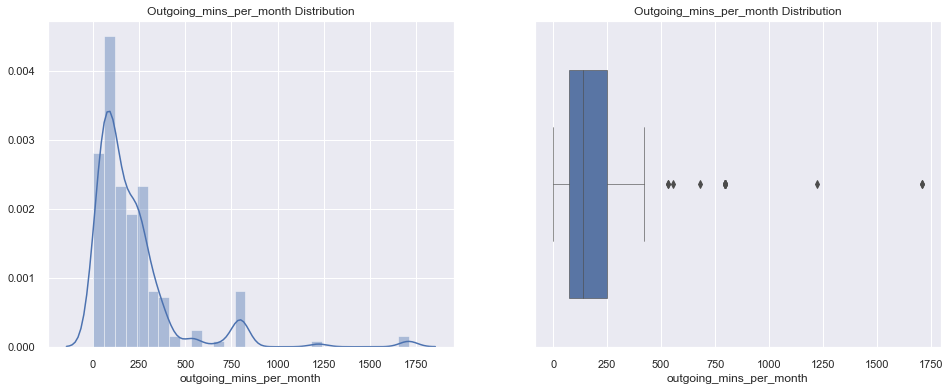

In [75]:
def summary(x):
    x_min = mydata[x].min()
    x_max = mydata[x].max()
    Q1 = mydata[x].quantile(0.25)
    Q2 = mydata[x].quantile(0.50)
    Q3 = mydata[x].quantile(0.75)
    print(f'{x.capitalize()} Desciption:\n'
          f'x(min) : {x_min}\n'
          f'Q1     : {Q1}\n'
          f'Q2     : {Q2}\n'
          f'Q3     : {Q3}\n'
          f'x(max) : {x_max}')

    fig = plt.figure(figsize=(16, 6))
    plt.subplot(121)
    ax1 = sns.distplot(mydata[x])
    plt.title(f'{x.capitalize()} Distribution')
    plt.subplot(122)
    ax2 = sns.boxplot(x=mydata[x], width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Distribution')
    plt.show()
    
summary('outgoing_mins_per_month')

Outgoing_sms_per_month Desciption:
x(min) : 0.25
Q1     : 22.564999999999998
Q2     : 66.65
Q3     : 124.92
x(max) : 540.6


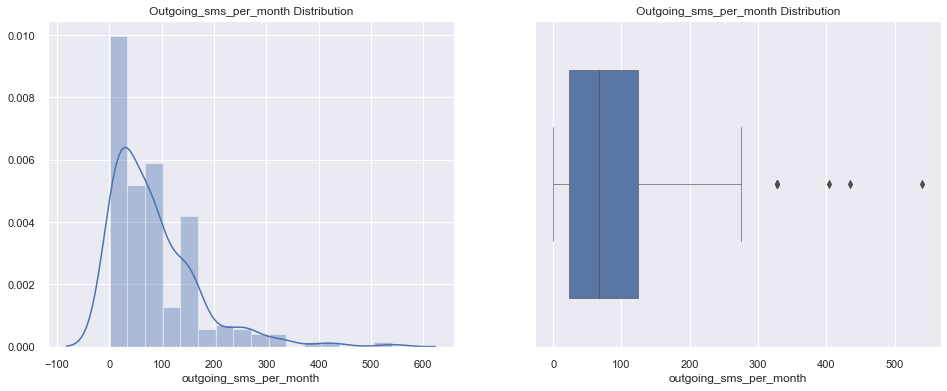

In [76]:
summary('outgoing_sms_per_month')

Monthly_mb Desciption:
x(min) : 0.0
Q1     : 1414.3600000000001
Q2     : 2076.45
Q3     : 5191.12
x(max) : 31146.67


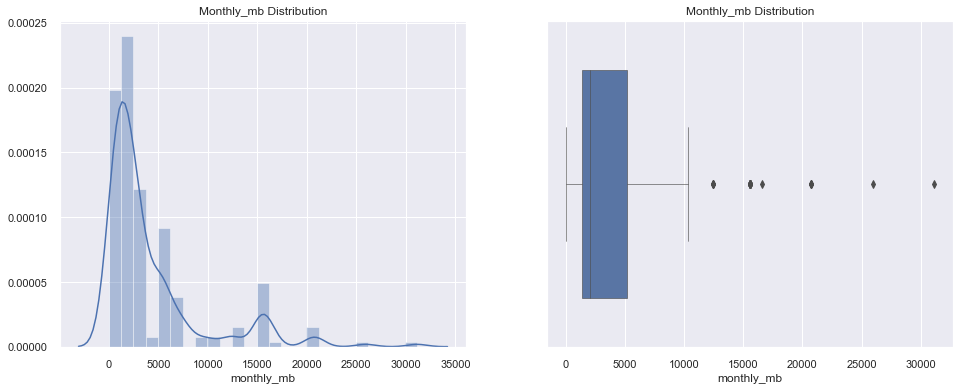

In [77]:
summary('monthly_mb')

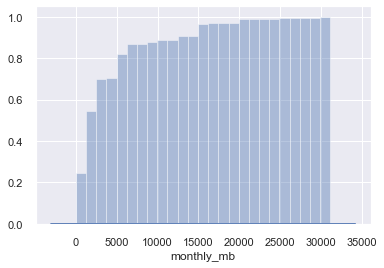

In [78]:
kwargs = {'cumulative': True}
# sns.distplot(mydata['monthly_mb'], hist_kws=kwargs, kde_kws=kwargs)
sns.distplot(mydata['monthly_mb'], hist_kws=kwargs)

Monthly_mb Desciption:
x(min) : 0.0
Q1     : 1414.3600000000001
Q2     : 2076.45
Q3     : 5191.12
x(max) : 31146.67


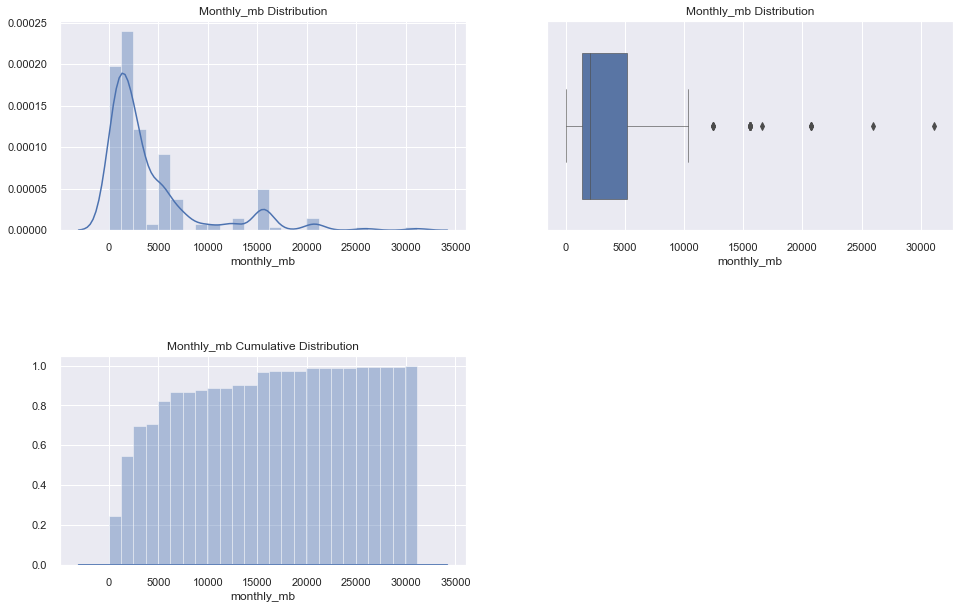

In [79]:
def summary2(x):
    x_min = mydata[x].min()
    x_max = mydata[x].max()
    Q1 = mydata[x].quantile(0.25)
    Q2 = mydata[x].quantile(0.50)
    Q3 = mydata[x].quantile(0.75)
    print(f'{x.capitalize()} Desciption:\n'
          f'x(min) : {x_min}\n'
          f'Q1     : {Q1}\n'
          f'Q2     : {Q2}\n'
          f'Q3     : {Q3}\n'
          f'x(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    plt.subplot(221)
    ax1 = sns.distplot(mydata[x])
    plt.title(f'{x.capitalize()} Distribution')
    plt.subplot(222)
    ax2 = sns.boxplot(x=mydata[x], width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Distribution')
    plt.subplot(223)
    ax3 = sns.distplot(mydata['monthly_mb'], hist_kws = {'cumulative': True})
    plt.title(f'{x.capitalize()} Cumulative Distribution')
    plt.show()
    
summary2('monthly_mb')

Outgoing_mins_per_month Desciption:
x(min) : 0.5
Q1     : 71.59
Q2     : 137.06
Q3     : 250.87
x(max) : 1710.08


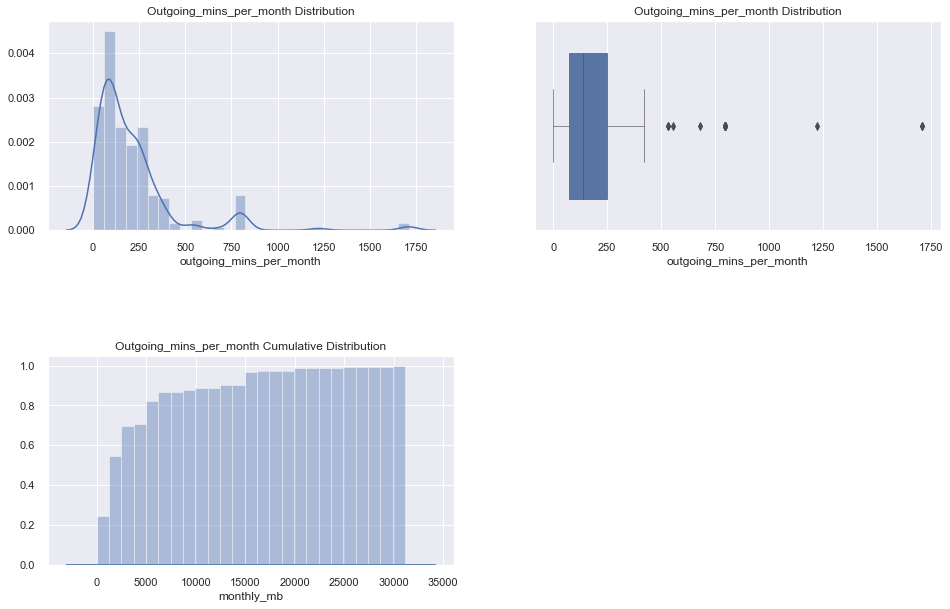

In [80]:
summary2('outgoing_mins_per_month')

Source: 
 - 1. [Pareto Plot 1](https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python)
 - 2. [Pareto Plot 2](https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python)

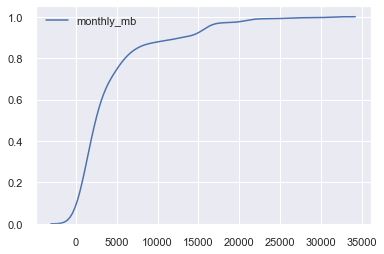

In [81]:
s = mydata['monthly_mb']
sns.kdeplot(s, cumulative=True)

## <font color = 'blue'>2.3 Merging on Index</font>
In some cases, the merge key(s) in a DataFrame will be found in its index. In this
case, you can pass <code>left_index=True</code> or <code>right_index=True</code> (or both) to indicate that
the index should be used as the merge key:

In [82]:
left1 = pd.DataFrame({
    'key': list('abcbcdcde'),
    'value': np.random.randn(9)
    })
right1 = pd.DataFrame({
    'group_val': np.random.randn(4),
    },
    index = list('abcd'))
left1

,key,value
0,a,-1.622843
1,b,-1.081228
2,c,1.269849
3,b,-0.362748
4,c,0.622680
5,d,0.064406
6,c,0.270480
7,d,1.697821
8,e,-1.314181


In [83]:
right1

,group_val
a,1.442180
b,1.280808
c,0.165277
d,-1.067987


In [84]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,-1.622843,1.442180
1,b,-1.081228,1.280808
3,b,-0.362748,1.280808
2,c,1.269849,0.165277
4,c,0.622680,0.165277
6,c,0.270480,0.165277
5,d,0.064406,-1.067987
7,d,1.697821,-1.067987


In [85]:
# Since the default merge method is to intersect the join keys, you can instead form the union of them with an outer join:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,-1.622843,1.442180
1,b,-1.081228,1.280808
3,b,-0.362748,1.280808
2,c,1.269849,0.165277
4,c,0.622680,0.165277
6,c,0.270480,0.165277
5,d,0.064406,-1.067987
7,d,1.697821,-1.067987
8,e,-1.314181,NaN


In [86]:
# With hierarchically indexed data, things are more complicated, as joining on index is implicitly a multiple-key merge:
left2 = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'key2': [2000, 2001, 2002, 2001, 2002], 'data': np.arange(5.)})
left2

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [87]:
right2 = pd.DataFrame(np.arange(12).reshape((6, 2)),
index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], [2001, 2000, 2000, 2000, 2001, 2002]], columns=['event1', 'event2'])
right2

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [88]:
# In this case, you have to indicate multiple columns to merge on as a list (note the handling of duplicate index values with how='outer'):
pd.merge(left2, right2, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [89]:
pd.merge(left2, right2, left_on=['key1', 'key2'], right_index=True, how = 'outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [90]:
# Using the indexes of both sides of the merge is also possible:
left3 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'], columns=['Ohio', 'Nevada'])
left3

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [91]:
right3 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]], index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
right3

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [92]:
pd.merge(left3, right3, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


DataFrame has a convenient <code>join()</code> instance for merging by index. It can also be used
to combine together many DataFrame objects having the same or similar indexes but
non-overlapping columns. In the prior example, we could have written:

In [93]:
left3.join(right3, how = 'outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In part for legacy reasons (i.e., much earlier versions of pandas), DataFrame’s <code>join()</code>
method performs a left join on the join keys, exactly preserving the left frame’s row
index. It also supports joining the index of the passed DataFrame on one of the columns
of the calling DataFrame:

In [94]:
left1.join(right1, on='key').sort_values(by = 'key')

,key,value,group_val
0,a,-1.622843,1.442180
1,b,-1.081228,1.280808
3,b,-0.362748,1.280808
2,c,1.269849,0.165277
4,c,0.622680,0.165277
6,c,0.270480,0.165277
5,d,0.064406,-1.067987
7,d,1.697821,-1.067987
8,e,-1.314181,NaN


Lastly, for simple index-on-index merges, you can pass a list of DataFrames to join as
an alternative to using the more general <code>concat()</code> function described in the next
section:

In [95]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]], index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [96]:
left3.join([right3, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [97]:
left3.join([right3, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


# <font color = 'green'>3. Concatination</font>
Another kind of data combination operation is referred to interchangeably as concatenation,
binding, or stacking. NumPy’s <code>concatenate()</code> function can do this with
NumPy arrays:

In [98]:
a = np.arange(12).reshape(3, 4)
b = np.array(list('abcdefghijkl')).reshape(3, 4)
c = np.concatenate([a, b])
d = np.concatenate([a, b], axis=1)
print('c:\n', c)
print()
print('d:\n', d)

c:
 [['0' '1' '2' '3']
 ['4' '5' '6' '7']
 ['8' '9' '10' '11']
 ['a' 'b' 'c' 'd']
 ['e' 'f' 'g' 'h']
 ['i' 'j' 'k' 'l']]

d:
 [['0' '1' '2' '3' 'a' 'b' 'c' 'd']
 ['4' '5' '6' '7' 'e' 'f' 'g' 'h']
 ['8' '9' '10' '11' 'i' 'j' 'k' 'l']]


In the context of pandas objects such as Series and DataFrame, having labeled axes
enable you to further generalize array concatenation. In particular, you have a number
of additional things to think about:
 - If the objects are indexed differently on the other axes, should we combine the distinct elements in these axes or use only the shared values (the intersection)?
 - Do the concatenated chunks of data need to be identifiable in the resulting object?
 - Does the “concatenation axis” contain data that needs to be preserved? In many cases, the default integer labels in a DataFrame are best discarded during concatenation.
The <code>concat()</code> function in pandas provides a consistent way to address each of these
concerns.

In [99]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [100]:
# By default concat works along axis=0, producing another Series. If you pass axis=1, the result will instead be a DataFrame (axis=1 is the columns):
pd.concat([s1, s2, s3], axis=1, sort = True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [101]:
# In this case there is no overlap on the other axis, which as you can see is the sorted union (the 'outer' join) of the indexes. You can instead intersect them by passing join='inner':
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [102]:
pd.concat([s1, s4], axis=1, sort = True)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [103]:
pd.concat([s1, s4], axis=1, join='inner', sort = True)

,0,1
a,0,0
b,1,1


In [104]:
# You can even specify the axes to be used on the other axes with join_axes:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

D:\Programs\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


A potential issue is that the concatenated pieces are not identifiable in the result. Suppose
instead you wanted to create a hierarchical index on the concatenation axis. To
do this, use the <code>keys</code> argument:

In [105]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [106]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [107]:
# In the case of combining Series along axis=1, the keys become the DataFrame column headers:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'], sort = True)

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


### Concatination of DataFrames
The same logic extends to DataFrame objects:

In [108]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [109]:
df2

,three,four
a,5,6
c,7,8


In [110]:
df = pd.concat([df1, df2], keys=['level1', 'level2'], sort = True)
cols = ['one', 'two', 'three', 'four']
df = df[cols]
df

one  two  three  four
level1 a  0.0  1.0    NaN   NaN
       b  2.0  3.0    NaN   NaN
       c  4.0  5.0    NaN   NaN
level2 a  NaN  NaN    5.0   6.0
       c  NaN  NaN    7.0   8.0

In [111]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], sort = True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [112]:
# If you pass a dict of objects instead of a list, the dict’s keys will be used for the keys option:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort = True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [113]:
# A last consideration concerns DataFrames in which the row index does not contain any relevant data. In this case, you can pass ignore_index=True:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['a', 'b', 'd'])
pd.concat([df1, df2], ignore_index=True, sort = True)

,a,b,c,d
0,0.616849,0.680185,0.260958,0.644757
1,1.187136,-0.966318,-0.523958,-0.440125
2,-0.291762,0.710711,1.273239,0.905910
3,0.365818,0.727778,NaN,-0.151236
4,-0.108693,-0.845697,NaN,0.146725


# <font color = 'green'>4. Reshaping and Pivoting</font>
### Reference:
 - 1. [DQ World Happiness Report](https://www.dataquest.io/blog/pandas-pivot-table/)
 - 2. [pbpython](https://pbpython.com/pandas-pivot-table-explained.html)
 - 3. [Categorical Data: pandas doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [114]:
df = pd.read_excel('sales.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


For convenience sake, let’s define the status column as a <code>category</code> and set the order we want to view. This isn’t strictly required but helps us keep the order we want as we work through analyzing the data

In [115]:
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
